In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("altruistdelhite04/gold-price-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\rohit\.cache\kagglehub\datasets\altruistdelhite04\gold-price-data\versions\1


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [4]:
gold_dataset = pd.read_csv(r"C:\Users\rohit\OneDrive\Desktop\mach_learning\Gold_Price_Prediction\gld_price_data.csv")

In [5]:
gold_dataset.shape

(2290, 6)

In [6]:
gold_dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
gold_dataset.describe()


,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [9]:
gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [12]:
gold_dataset['Date'] = pd.to_datetime(gold_dataset['Date'])

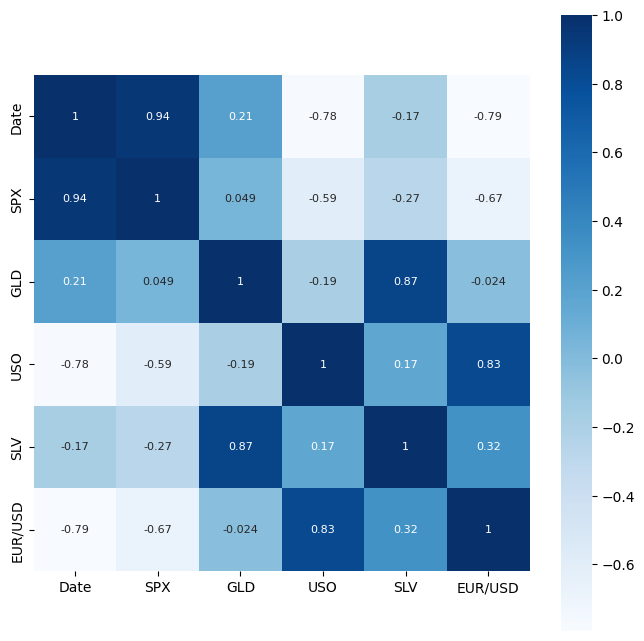

In [14]:
plt.figure(figsize=(8,8))
sns.heatmap(gold_dataset.corr(),cmap = 'Blues', annot=True,annot_kws={"size":8},square=True,cbar=True)
plt.show()

In [16]:
print(gold_dataset.corr()['GLD'])
print(gold_dataset.corr()['SPX'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64
Date       0.944033
SPX        1.000000
GLD        0.049345
USO       -0.591573
SLV       -0.274055
EUR/USD   -0.672017
Name: SPX, dtype: float64


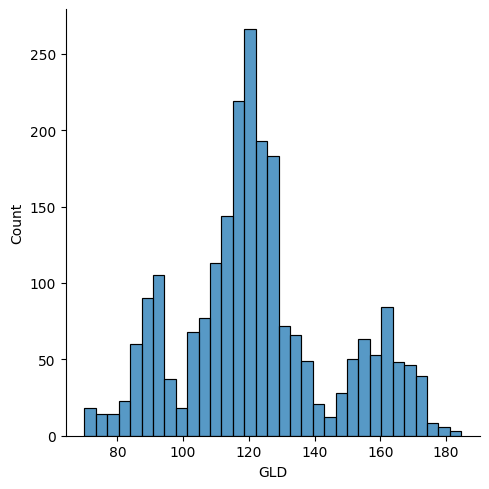

In [17]:
sns.displot(gold_dataset['GLD'])
plt.show()

In [18]:
# Split the data into features and target
X = gold_dataset.drop(['Date','GLD'], axis=1)
Y = gold_dataset['GLD']

In [19]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [20]:
# Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
model = RandomForestRegressor()
model.fit(X_train, Y_train)
# Save trained model to disk for reuse in GUI or later predictions
with open('gold_price_model.pkl', 'wb') as f:
    pickle.dump(model, f)
print('Saved trained model to gold_price_model.pkl')

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [26]:
traing_data_prediction = model.predict(X_train)
print("r2_score : ", r2_score(Y_train, traing_data_prediction))
print("MAE : ", mean_absolute_error(Y_train, traing_data_prediction))
print("MSE : ", mean_squared_error(Y_train, traing_data_prediction))

r2_score :  0.9985792982879758
MAE :  0.47831691585152764
MSE :  0.7749311381263021


In [27]:
test_data_prediction = model.predict(X_test)
print("r2_score : ", r2_score(Y_test, test_data_prediction))
print("MAE : ", mean_absolute_error(Y_test, test_data_prediction))
print("MSE : ", mean_squared_error(Y_test, test_data_prediction))

r2_score :  0.9894891118551473
MAE :  1.3274278575109155
MSE :  5.543899638099523
